In [1]:
import sys
sys.path.append("../")
from lib.metadata import MetadataListTusz
from lib.signals import EegProcessorTusz
from lib.spectral import FourierAnalysis
from lib.filters import FilterBank
from lib.visuals import plot_eeg_windows, plot_eeg_spectrum

/var/tmp/venv-project-1/lib/python3.11/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


#### * Scales the EEG signal
#### * Select a subset of the channels

Extracting EDF parameters from /mnt/c/Users/tobit/Downloads/eeg_datasets/tusz/edf/train/02_tcp_le/078/00007835/s002_2011_06_20/00007835_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
2025-02-13 00:43:43,199 - root - INFO - Recording contains channels = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC', 'DC4-DC', 'DC5-DC', 'DC6-DC', 'DC7-DC', 'DC8-DC']


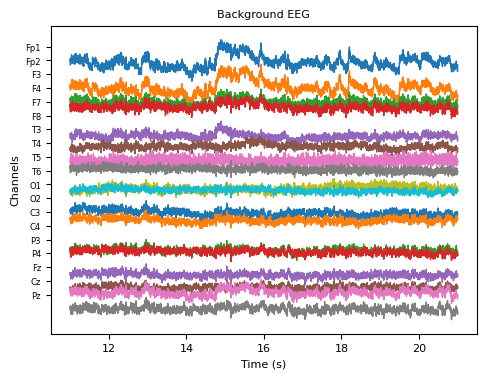

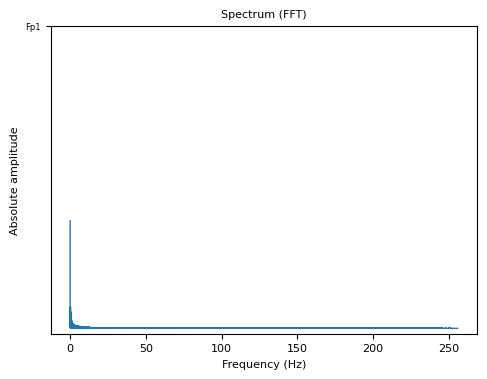

In [2]:
PATIENT = "00007835"
FILENAME = "00007835_s002_t001.edf"
PERIOD = [11, 21]

###########################################################
metadata = MetadataListTusz()
current_metadata = metadata.get(PATIENT, FILENAME)

###########################################################
processor = EegProcessorTusz(current_metadata["full_file"])
processor.scale()
processor.select_channels()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)
frequency_range, spectral_components = fourier.run_fast_fourier_transform(processor._data)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

###########################################################
plot_eeg_spectrum(frequency_range, spectral_components, processor.selected_channels, subset_channels=[0])

### * Resample the EEG to 256Hz

2025-02-13 00:44:33,095 - root - INFO - Dowsampling factor is = 2


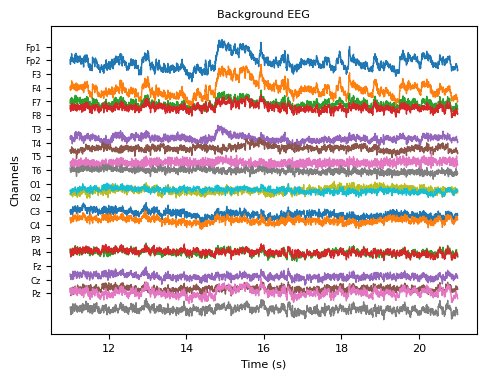

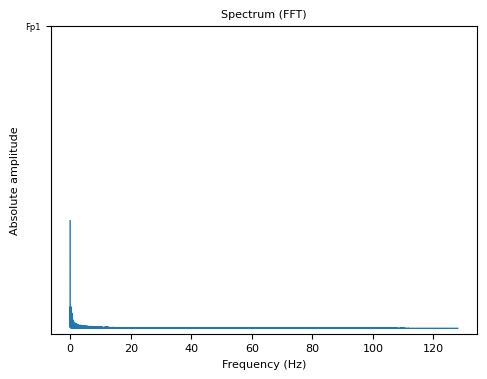

In [3]:
###########################################################
processor.resample()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)
frequency_range, spectral_components = fourier.run_fast_fourier_transform(processor._data)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

###########################################################
plot_eeg_spectrum(frequency_range, spectral_components, processor.selected_channels, subset_channels=[0])

### * Remove the drift noise

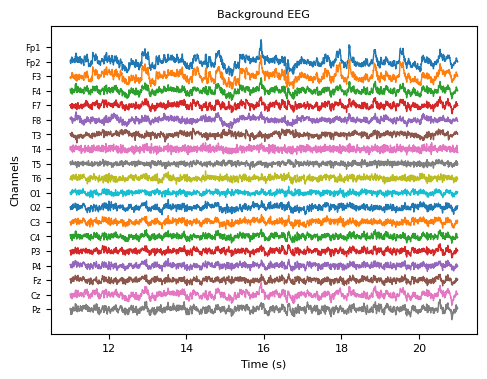

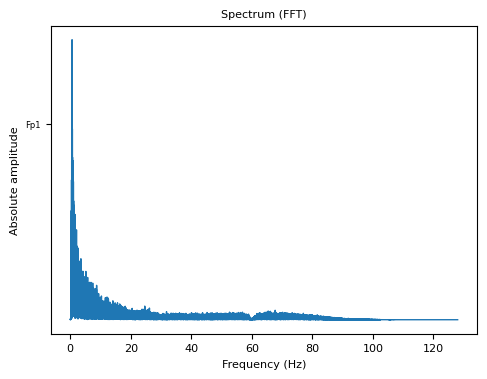

In [4]:
###########################################################
processor.filter_bank = FilterBank(0)
processor.remove_drift()
processor.remove_hfo()
processor.remove_power_noise()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)
frequency_range, spectral_components = fourier.run_fast_fourier_transform(processor._data)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

###########################################################
plot_eeg_spectrum(frequency_range, spectral_components, processor.selected_channels, subset_channels=[0])